Cacher le chargement des feuilles de style.

In [41]:
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from IPython.display import Latex
from IPython.display import clear_output


class QuestionCM(object):
    def __init__(self, idt, description):
        self.__idt = idt
        self.description = description
    
    @property
    def idt(self):
        return self.__idt
    
    @property
    def description(self):
        return self.__description
    @description.setter
    def description(self, description: str):
        self.__description = description
    @property
    def answers(self):
        return self.__answers
    @answers.setter
    def answers(self, answers):
        self.__answers = answers
    @property
    def rightAnswer(self):
        return self.__rightAnswer
    @rightAnswer.setter
    def rightAnswer(self, rightAnswer: str):
        self.__rightAnswer = rightAnswer
        if rightAnswer not in self.__answers:
            self.__answers.append(rightAnswer)
    @property
    def comment(self):
        return self.__comment
    @comment.setter
    def comment(self, comment):
        self.__comment = comment
    
    def rightAnswerIndex(self):
        return self.answers.index(self.rightAnswer)
    
    def createMCQWidget(self):
        correct_answer_index = self.rightAnswerIndex()
        radio_options      = [(str(words), i) for i, words in enumerate(self.answers)]
        alternativ = widgets.RadioButtons(
            options = radio_options,
            description = '',
            disabled = False
        )
           
        description_out = widgets.Output()
        with description_out:
            display({'text/plain': self.description, 'text/markdown': self.description}, raw=True)
        
        feedback_out = widgets.Output()
        def check_selection(b):
            with feedback_out:
                clear_output()          
            a = int(alternativ.value)
            if a==correct_answer_index:
                s = '\x1b[6;30;42m' + "Réponse correcte." + '\x1b[0m' +"\n" #green color
            else:
                s = '\x1b[5;30;41m' + "Réponse incorecte. " + '\x1b[0m' +"\n" #red color
            s += self.comment
            print(s)
             
            return
    
        check = widgets.Button(description="submit")
        check.on_click(check_selection)
    
        return widgets.VBox([description_out, alternativ, check, feedback_out])
    
    def display(self):
        display(self.createMCQWidget())
        
class QuestionCMLatex(object):
    def __init__(self, idt, description):
        self.__idt = idt
        self.description = description
    
    @property
    def idt(self):
        return self.__idt
    
    @property
    def description(self):
        return self.__description
    @description.setter
    def description(self, description: str):
        self.__description = description
    @property
    def answers(self):
        return self.__answers
    @answers.setter
    def answers(self, answers):
        self.__answers = answers
    @property
    def rightAnswer(self):
        return self.__rightAnswer
    @rightAnswer.setter
    def rightAnswer(self, rightAnswer: str):
        self.__rightAnswer = rightAnswer
        if rightAnswer not in self.__answers:
            self.__answers.append(rightAnswer)
    @property
    def comment(self):
        return self.__comment
    @comment.setter
    def comment(self, comment):
        self.__comment = comment
    
    def rightAnswerIndex(self):
        return self.answers.index(self.rightAnswer)
    
    def createMCQWidget(self):
        correct_answer_index = self.rightAnswerIndex()
        radio_options      = [(i+1, i) for i, words in enumerate(self.answers)]
        radio_descriptions = [(display(Latex(str(i+1) + ' - ' + words)), i) for i, words in enumerate(self.answers)]
        alternativ = widgets.RadioButtons(
            options = radio_options,
            description = '',
            disabled = False
        )
           
        description_out = widgets.Output()
        with description_out:
            display({'text/plain': self.description, 'text/markdown': self.description}, raw=True)
        
        feedback_out = widgets.Output()
        def check_selection(b):
            with feedback_out:
                clear_output()          
            a = int(alternativ.value)
            if a==correct_answer_index:
                s = '\x1b[6;30;42m' + "Réponse correcte." + '\x1b[0m' +"\n" #green color
            else:
                s = '\x1b[5;30;41m' + "Réponse incorecte. " + '\x1b[0m' +"\n" #red color
            print(s)
            display(Latex(self.comment))
             
            return
    
        check = widgets.Button(description="submit")
        check.on_click(check_selection)
    
        return widgets.VBox([description_out, alternativ, check, feedback_out])
    
    def display(self):
        display(self.createMCQWidget())

        
# Définition des questions
QCM01 = '''QCM 01
Comment obtient-on $y[4]$ ?
'''

q01rep01 = '''$y[4] =  h[-2] \\times  x[6] +  h[-1] \\times x[5] +  h[0] \\times x[4] +  h[1] \\times x[3] +  h[2] \\times x[2]$'''
q01rep02 = '''$y[4] = h1[-2] \\times  x[6] + h1[-1] \\times x[5] + h1[0] \\times x[4] + h1[1] \\times x[3] + h1[2] \\times x[2]$'''
q01rep03 = '''$y[4] = h'[-2] \\times  x[6] + h'[-1] \\times x[5] + h'[0] \\times x[4] + h'[1] \\times x[3] + h'[2] \\times x[2]$'''
q01rep04 = '''$y[4] =  h[-2] \\times  x[2] +  h[-1] \\times x[3] +  h[0] \\times x[4] +  h[1] \\times x[5] +  h[2] \\times x[6]$'''
q01rep05 = '''$y[4] = h1[-2] \\times  x[2] + h1[-1] \\times x[3] + h1[0] \\times x[4] + h1[1] \\times x[5] + h1[2] \\times x[6]$'''
q01rep06 = '''$y[4] = h'[-2] \\times  x[2] + h'[-1] \\times x[3] + h'[0] \\times x[4] + h'[1] \\times x[5] + h'[2] \\times x[6]$'''
q01rep07 = '''$y[4] =  h[0]  \\times  x[2] +  h[1]  \\times x[3] +  h[2] \\times x[4] +  h[3] \\times x[5] +  h[4] \\times x[6]$'''
q01rep08 = '''$y[4] = h1[0]  \\times  x[2] + h1[1]  \\times x[3] + h1[2] \\times x[4] + h1[3] \\times x[5] + h1[4] \\times x[6]$'''
q01rep09 = '''$y[4] = h'[0]  \\times  x[2] + h'[1]  \\times x[3] + h'[2] \\times x[4] + h'[3] \\times x[5] + h'[4] \\times x[6]$'''
q01rep10 = '''$y[4] =  h[0]  \\times  x[4] +  h[1]  \\times x[5] +  h[2] \\times x[6] +  h[3] \\times x[7] +  h[4] \\times x[8]$'''
q01rep11 = '''$y[4] = h1[0]  \\times  x[4] + h1[1]  \\times x[5] + h1[2] \\times x[6] + h1[3] \\times x[7] + h1[4] \\times x[8]$'''

question01 = QuestionCMLatex('q01', QCM01)
question01.answers = [q01rep01, q01rep02, q01rep03, q01rep04, q01rep05, q01rep06, q01rep07, q01rep08, q01rep09, q01rep10, q01rep11]
question01.rightAnswer = q01rep01
question01.comment = ''' $h$ est le noyau de convolution qui n'a subi aucune transformation, et qui
        est centré sur l'origine (le point où l'on applique le filtre).
        $y$ est calculé par l'équation directe de la convolution:
        $y[i]  = \\sum_{l=-\\frac{N_{h}}{2}}^{\\frac{N_{h}}{2}} h[l] \\times  x[i - l] $.

        Donc $y[4] =  h[-2] \\times  x[6] +  h[-1] \\times x[5] +  h[0] \\times x[4] +  h[1] \\times x[3] +  h[2] \\times x[2]$

        $h1$ est le noyau qui a subi un retournement spatial. Il perment de changer les $x[i-l]$ en $x[i+l]$.
        On a donc $y[i]  = \\sum_{l=-\\frac{N_{h}}{2}}^{\\frac{N_{h}}{2}} h1[l] \\times  x[i + l] $.

        Donc $y[4] = h1[-2] \\times  x[2] + h1[-1] \\times x[3] + h1[0] \\times x[4] + h1[1] \\times x[5] + h1[2] \\times x[6]$

        Enfin, $h'$ équivaut à $h1$ dont on a décalé le repère pour n'avoir que
        des indices positifs. Attention, dans ce cas, on a également décalé les indices
        de $x$ et de $y$...

        Donc $y[4] = h'[0] \\times  x[4] + h'[1] \\times x[5] + h'[2] \\times x[6] + h'[3] \\times x[7] + h'[4] \\times x[8]$'''


QCM02 = '''Pour la valeur de $y[0]$, dans l'exemple, on a complété le signal avec la valeur 0 pour les valeurs inconnues. 
On pourrait également:\n\n'''

q02rep01 = '''Ne pas calculer y[0], dire qu'il est non defini et que y est un signal plus court.\n\n'''
q02rep02 = '''Calculer non seulement y[0], mais aussi y[-1] et y[-2].\n\n'''
q02rep03 = '''Calculer y[0] en fonction non seulement de x[0], x[1] et x[2], mais également de x[15] et x[14].\n\n'''
q02rep04 = '''Aucune des propositions n'est correcte \n\n'''
q02rep05 = '''Toutes les propositions sont correctes\n\n'''

question02 = QuestionCM('q02', QCM02)
question02.answers = [q02rep01, q02rep02, q02rep03, q02rep04, q02rep05]
question02.rightAnswer = q02rep05
question02.comment = "Toutes ces solutions sont envisageables. Les 2 premières seront implémentées dans ce TP."


QCM03 = '''Dans l'exemple du document pdf, le calcul qui vous a été montré était de type '''
q03rep01 = '''full'''
q03rep02 = '''same'''
q03rep03 = '''valid'''
question03 = QuestionCM('q03',QCM03)
question03.answers = [q03rep01, q03rep02, q03rep03]
question03.rightAnswer = q03rep02
question03.comment = '''Dans les calculs manuels précédents, on obtenait un signal de sortie de la même taille que le signal d'entrée, et les valeurs manquantes pour le calcul étaient remplacées par zéros.'''

QCM04 = ''' Où faut-il mettre les axes du signal d'entrée $x$ et du signal de sortie $y$ pour avoir la configuration <i>"full"</i> par rapport à l'exemple manuel avec $h'$ ? '''
q04rep01 = '''Il faut décaler l'axe du signal d'entrée de 2 unités sur la gauche'''
q04rep02 = '''Il faut décaler l'axe du signal de sortie de 2 unités sur la gauche'''
question04 = QuestionCM('q04', QCM04)
question04.comment = '''Vous pouvez ouvrir <a href="http://l3miagelw.free.fr/tim/tp02//convolution1DFull.pdf">ce document</a> pour comprendre la solution.'''
question04.answers = [q04rep01, q04rep02]
question04.rightAnswer = q04rep01

QCM05 = '''Où faut-il mettre les axes du signal d'entrée $x$ et du signal de sortie $y$ pour avoir la configuration <i>"full"</i> par rapport à l'exemple manuel avec $h'$ ? '''
q05rep01 = '''$[10,−10,−9,11,55,95]$'''
q05rep02 = '''$[2,14,−5,−9,−149,107]$'''
q05rep03 = '''$[5,−2,4,4,65,100]$'''
q05rep04 = '''$[1,−2,−4,−4,−155,112]$'''        
q05rep05 = '''Aucune des solutions proposées'''
question05 = QuestionCM('q05', QCM05)
question05.answers = [q05rep01, q05rep02, q05rep03, q05rep04, q05rep05]
question05.rightAnswer = q05rep05
question05.comment = '''En effet, l'une des solutions proposée est exacte à une valeur près...
Attention à bien retourner votre noyau !'''


# TP TIM 02: Filtrage par Convolution

## Objectifs du TP
* Comprendre le fonctionnement et l'implémentation de la convolution
* Appliquer des filtres par convolution en 1D et 2D et observer les résultats
* Construire et appliquer des filtres de lissage ou de réhaussement de contraste 

## Évaluation
L'évaluation du TP est composée d'une partie code et d'une partie compte-rendu
Un compte-rendu **au format pdf** d'au **maximum 6 pages** est à rédiger selon les directives données <a href="http://l3miagelw.free.fr/tim/introCours/introCours.html">ici</a>.
Le compte-rendu portera sur les parties 2 et 3, application des filtres de convolution. Vous choisirez une/des hypothèses sur les filtres Gaussiens et du Gradient. Vous explicitez les expérimentations menées ci-dessous et concluerez par rapport à vos hypothèses.

<div class="warning">Le compte-rendu est à remettre sur Caseine avant le début du prochain TP TIM, dans 4 semaines c'est-à-dire avant le 13/03/2024 13h30.</div>

# 1- Fonction de Convolution 1D
Le but de cet exercice est d'implémenter l'algorithme de convolution 1D, c'est-à-dire sur un signal 1D ou une ligne d'une image.

Cet exercice permet de bien comprendre et maitriser tous les paramètres de la convolution (taille et sens du noyau, effets de bords, etc. avant de passer à l'implémentation de la convolution 2D sur les images.

## Un exemple de convolution *manuelle*
On note $x$ un signal 1D de taille $N_{x}$ et $h$ un noyau de convolution de taille $N_{h}$ dont les indices sont numérotés de $0$ à $N_{h}-1$.

La sortie après la convolution est notée $y$. Sa taille dépendra de la gestion choisie pour les effets de bords, dans cet exemple, on prendra $N_{y} = N_{x}$. On a : 
$$y[i] = \sum_{l=0}^{N_{h}-1} h[l] \times x[i-l]$$

Pour calculer $y$ on centre le noyau et on effectue un retournement spatial.
<a href="http://l3miagelw.free.fr/tim/tp02//convolution1D.pdf">ce document</a> montre un exemple de calcul effectif de convolution entre un signal 1D et un noyau. 

<div class="question"><div class="questionHeader">Question 1.1</div>
Ouvrir <a href="http://l3miagelw.free.fr/tim/tp02//convolution1D.pdf">ce document</a> et le faire défiler page par page en plein écran. 
</div>


In [42]:
question01.display()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [43]:
question02.display()

## Implémentation Python
<div class="warning">
    Attention, vous risquez de passer beaucoup plus de temps que prévu sur cette partie si vous n'avez pas correctement fait la partie précédente...
</div>
Le but de cet exercice est d'écrire et de tester la fonction Python 
<tt>ySape = Conv1D(x, h, shape)</tt> où <tt>shape</tt> peut prendre 3 valeurs : "full", "same" ou "valid".

<ul>
    <li><b>Configuration <i>"full"</i></b><br/>
        La première implémentation correspondra à la taille maximale de $y$ avec $N_{x} +  2 \times (N_{h}-1)$ valeurs. On notera cette configuration <i>"full"</i>. Pour calculer les valeurs de $y$ sur les bords gauche et droit, le signal (la ligne) d'entrée $x$ sera complété par des zéros.
    </li>
    <li><b>Configurations <i>"same"</i> et <i>"valid"</i></b><br/>
        À partir de cette configuration <i>"full"</i>, deux autres configurations <i>"same"</i> : même taille que l'entrée $x$ et <i>"valid"</i> : uniquement les valeurs calculées sur les valeurs de $x$ sans rajout de positions supplémentaires, se déduiront ainsi:
    </li>
</ul>

In [44]:
import numpy as np
# On définit arbitrairement ici, pour l'exemple les variables utilisées
x = np.array([1, 0, 2, 3, 2, 1, -1, -2, -1, 0, 2, 3, 3, 2, 1, 1])
h = np.array([-1, 2, 2, 3, -1])
Nh = h.size        
Nx = x.size

def Conv1D(x, h, shape='full'):
    Nx = len(x)
    Nh = len(h)

    print(Nx, Nh)

    if shape.lower() == 'full':
        # Longueur de la convolution pour le mode "full" : N_x + N_h - 1
        Ny = Nx + Nh - 1
        x_padded = np.pad(x, (Nh - 1, Nh - 1), 'constant', constant_values=(0, 0))
    elif shape.lower() == 'valid':
        # Longueur de la convolution pour le mode "valid" : N_x - N_h + 1
        Ny = Nx - Nh + 1
        x_padded = x
    elif shape.lower() == 'same':
        # Longueur de la convolution pour le mode "same" : N_x
        Ny = Nx
        # Le décalage dépend de la longueur du filtre h
        pad_width = (Nh - 1) // 2
        x_padded = np.pad(x, (pad_width, pad_width), 'constant', constant_values=(0, 0))

    # Initialisation du résultat de la convolution
    y = np.zeros(Ny)

    for n in range(Ny):
        # Element-wise multiplication puis somme
        y[n] = np.sum(x_padded[n:n+Nh] * h[::-1])

    return y;


# ce tableau sera calculé automatiquement par la méthode Conv1D...
y = np.array([-1, 2, 0, 4, 7, 15, 14, 5, -4, -10, -9, 0, 8, 16, 16, 6, 5, 3, 2, -1])

# à changer pour tester les différentes configurations:
shape = 'same' 


# On récupère de manière générique le vecteur de sortie de la taille correspondant au paramètre shape.
SizeEffect = int(round((Nh-1)/2.0))
if 'full' in shape.lower():
    yShape = y
elif 'valid' in shape.lower():
    yShape = y[Nh-1 : Nx]
elif 'same' in shape.lower():
    yShape = y[SizeEffect: Nx +SizeEffect]
    
print("y: ", y)
for shape in ['full', 'same', 'valid']:
    y = Conv1D(x, h, shape)
    print(f"y ({shape}): {y}")
    print(len(y))


y:  [ -1   2   0   4   7  15  14   5  -4 -10  -9   0   8  16  16   6   5   3
   2  -1]
16 5
y (full): [ -1.   2.   0.   4.   7.  15.  14.   5.  -4. -10.  -9.   0.   8.  16.
  16.  11.   7.   3.   2.  -1.]
20
16 5
y (same): [  0.   4.   7.  15.  14.   5.  -4. -10.  -9.   0.   8.  16.  16.  11.
   7.   3.]
16
16 5
y (valid): [  7.  15.  14.   5.  -4. -10.  -9.   0.   8.  16.  16.  11.]
12


In [45]:
question03.display()

In [46]:
question04.display()

<div class="question">
    <div class="questionHeader">Question 1.7</div>
    Calculer <b>Manuellement</b> la convolution entre le signal $x = \{2, 1, 2, 3, 4, 56 \}$ et le noyau $h=\{ 1, 2, -3 \}$.
</div>
<div class="tip">
    <ol>
        <li>Se munir d'un papier et d'un crayon</li>
        <li>Desiner sur votre feuille, 2 tableaux à 7 cases, l'un en dessous de l'autre, en laissant la place pour les indices.</li>
        <li>Remplir le premier tableau avec le signal d'entrée $x$</li>
        <li>Dessiner puis découper sur une autre feuille de papier le noyau qui aura subi un retournement spatial</li>
        <li>Ajouter le nombre de cases nécessaires au signal d'entrée (remplies avec des 0) et au signal de sortie pour pouvoir faire le calcul.</li>
        <li>Faire glisser le noyau découpé au dessus du signal d'entrée, et calculer la valeur correspondante du signal de sortie. (s'entraîner un peu au calcul mental, prendre la calculatrice pour les valeurs élevées). Noter la valeur obtenue dans le tableau du bas</li>
        <li>Entourer de couleurs différentes sur le papier les valeurs du signal de sortie correspondantes aux configurations <i>"full"</i>, <i>"same"</i> et <i>"valid"</i>.</li>
    </ol>
</div>


In [47]:
question05.display()

<div class="question">
    <div class="questionHeader">Question 1.8</div>
    Complétez et testez le code ci-dessous.
</div>

<div class="tip">
    Nous allons utilise cette fonction dans la suite du TP. N'oubliez pas de recopier le code juste final ici !
</div>

In [55]:
######Direct convolution in the spatial domain
def Conv1D(x, h, shape):
    # Usage: z = Conv1D(x, h, shape)
    # Return the convolution between x and h with Nx+Nh-1 samples
    # shape: 'valid', 'same', 'full'

    Nx = len(x)
    Nh = len(h)
    SizeEffect = int(round((Nh-1)/2.0))

    # On "retourne" h (flip h)
    hPrime = h[::-1]

    # On calcule de base y 'full'.
    # Du coup, on complète x avec des zéros de chaque côté, de la taille du noyau
    NFull = Nx + 2*(Nh-1)
    xFull = np.zeros(NFull)
    # On prend x dans xFull entre les indices Nh-1 et Nx+Nh-1
    xFull[Nh-1:Nh-1+Nx] = x

    # On crée y de la taille maximale, c'est-à-dire Nx + Nh - 1
    NbY = Nx + Nh - 1
    y = np.zeros(NbY)

    # On calcule la valeur de chaque point d'y
    for i in range(NbY):
        start_index = max(0, i-(Nh-1))
        end_index = min(Nx-1, i)
        y[i] = np.sum(xFull[start_index:start_index+Nh] * hPrime)

    # On renvoie un vecteur plus ou moins tronqué selon la configuration
    if 'valid' in shape.lower():
        z = y[Nh-1 : Nx]
    elif 'same' in shape.lower():
        z = y[SizeEffect: Nx+Nh-1-SizeEffect]
    elif 'full' in shape.lower():
        z = y

    return z

# Example usage
x = np.array([2, 1, 2, 3, 4, 56])
h = np.array([1, 2, -3])
shape = 'full'  # Choose from 'full', 'same', 'valid'

z = Conv1D(x, h, shape)
print(f"Output ({shape}): {z}")
print(len(z))


Output (full): [ 2.  2.  2.  5. -2.  4.  4. 55.]
8


In [49]:
# test sur l'exemple manuel
x = np.array([1, 0, 2, 3, 2, 1, -1, -2, -1, 0, 2, 3, 3, 2, 1, 1])
h = np.array([-1, 2, 2, 3, -1])

y = Conv1D(x, h, 'valid')
print("longueur de x: ", len(x), ", longueur de h: ", len(h), ", longueur de yfull: ", len(y))
print(y)

[ 0.  0.  0.  0.  1.  0.  2.  3.  2.  1. -1. -2. -1.  0.  2.  3.  3.  2.
  1.  1.  0.  0.  0.  0.]
20
0 0 [0. 0. 0. 0. 1.] [-1  3  2  2 -1]
0 1 [0. 0. 0. 0. 1.] [-1  3  2  2 -1]
0 2 [0. 0. 0. 0. 1.] [-1  3  2  2 -1]
0 3 [0. 0. 0. 0. 1.] [-1  3  2  2 -1]
0 4 [0. 0. 0. 0. 1.] [-1  3  2  2 -1]
1 5 [0. 0. 0. 1. 0.] [-1  3  2  2 -1]
2 6 [0. 0. 1. 0. 2.] [-1  3  2  2 -1]
3 7 [0. 1. 0. 2. 3.] [-1  3  2  2 -1]
4 8 [1. 0. 2. 3. 2.] [-1  3  2  2 -1]
5 9 [0. 2. 3. 2. 1.] [-1  3  2  2 -1]
6 10 [ 2.  3.  2.  1. -1.] [-1  3  2  2 -1]
7 11 [ 3.  2.  1. -1. -2.] [-1  3  2  2 -1]
8 12 [ 2.  1. -1. -2. -1.] [-1  3  2  2 -1]
9 13 [ 1. -1. -2. -1.  0.] [-1  3  2  2 -1]
10 14 [-1. -2. -1.  0.  2.] [-1  3  2  2 -1]
11 15 [-2. -1.  0.  2.  3.] [-1  3  2  2 -1]
12 15 [-1.  0.  2.  3.  3.] [-1  3  2  2 -1]
13 15 [0. 2. 3. 3. 2.] [-1  3  2  2 -1]
14 15 [2. 3. 3. 2. 1.] [-1  3  2  2 -1]
15 15 [3. 3. 2. 1. 1.] [-1  3  2  2 -1]
longueur de x:  16 , longueur de h:  5 , longueur de yfull:  12
[ -1.   2.   0.   4.   

# 2- Convolution d'une image avec des filtres Gaussiens
Le but de cet exercice est d'implémenter, de tester et de comprendre par l'expérience le fonctionnement des filtres binomiaux. 

## Image de test
On considère l'image en niveaux de gris ci-dessous à gauche. Pour comprendre l'effet de *débruitage* des filtres binomiaux sur une image, on a sous-échantilloné et bruité artificiellement cette image. On obtient l'image de la cellule ci-dessous.

## Filtres Binomiaux pour les ignaux 1D
Nous allons dans un premier temps appliquer les filtres binomiaux sur un signal 1D.
Pour cel, nous prendrons le profil de l'image ci-dessus qui correspond à une ligne (la ligne en rouge sur l'image ci-dessus) de l'image bruitée. 

Récupérez le fichier <a href="http://l3miagelw.free.fr/tim/tp02/portrait-profil-200.txt">portrait-profil-200.txt</a> et copiez-le dans le répertoire adapté sur le serveur jupyter. 

Ouvrez et affichez ce signal.
    
Note : vous pouvez utiliser les commandes suivantes :

``` datafile = 'portrait-profil-200.txt'```

```   [axis, data] = np.loadtxt(datafile)```

Pour voir l'affichage, vous pouvezutiliser ```plt.plot(axis, data, '--', marker='h', linewidth=2)```

    
Que représentent les grands pics? Que représentent les petits pics ?


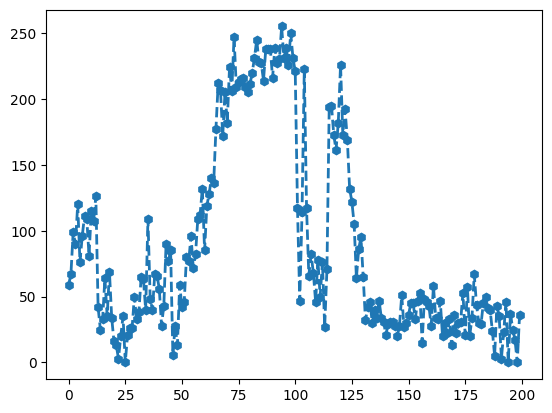

In [61]:
datafile = 'portrait-profil-200.txt'
[axis, data] = np.loadtxt(datafile)
plt.plot(axis, data, '--', marker='h', linewidth=2)

Créez *manuellement* un signal binomial 1D de taille 3 et un signal binomial 1D de taille 5 et convoluez-les avec le signal précédent. 

Représentez le signal initial et le signal obtenu sur le même graphique. Vous pourrez par exemple utiliser le code suivant:
```
timesX = np.array(range(0, Noriginal))
sOriginal = plt.stem(timesX, signalOriginal, linefmt='r-',  markerfmt='ro', basefmt='r-')
sFiltre2  = plt.stem(timesX, filtreTaille3,  linefmt='g--', markerfmt='go', basefmt='g-')
sFiltre3  = plt.stem(timesX, filtréTaille5,  linefmt='b:',  markerfmt='bo', basefmt='b-')```

   

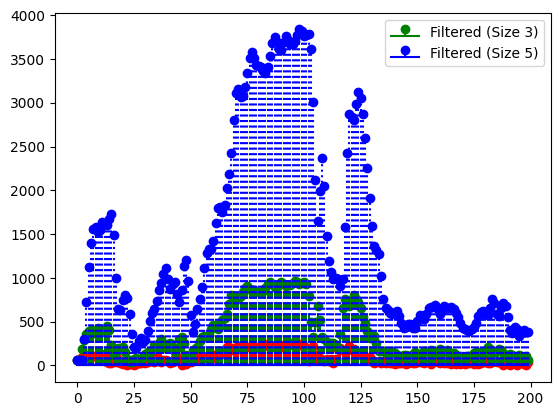

In [63]:
# Charger le dataset
datafile = 'portrait-profil-200.txt'
[axis, data] = np.loadtxt(datafile)

# Créer des filtres binomiaux
filtreTaille3 = np.array([1, 2, 1])
filtreTaille5 = np.array([1, 4, 6, 4, 1])
filtreTaille7 = np.array([1, 5, 10, 10, 5, 10])

# Effectuer les convolutions avec le signal original
# Note : Nous choisissons 'same' pour maintenir la même taille que l'entrée
filteredTaille3 = Conv1D(data, filtreTaille3, 'same')
filteredTaille5 = Conv1D(data, filtreTaille5, 'same')

# Afficher les signaux
plt.figure()
Noriginal = len(data)
timesX = np.array(range(0, Noriginal))

# Signal original
sOriginal = plt.stem(timesX, data, linefmt='r-', markerfmt='ro', basefmt='r-')
# Signal filtré avec le filtre de taille 3
sFiltre2 = plt.stem(timesX, filteredTaille3, linefmt='g--', markerfmt='go', basefmt='g-', label='Filtered (Size 3)')
# Signal filtré avec le filtre de taille 5
sFiltre3 = plt.stem(timesX, filteredTaille5, linefmt='b:', markerfmt='bo', basefmt='b-', label='Filtered (Size 5)')

plt.legend()
plt.show()


Que constatez-vous sur l'amplitude du signal de sortie ?

Pouquoi ?


Modifiez le code pour normaliser les coefficients binomiaux de votre noyeau de convolution. Représentez à nouveaux les signaux sur le même graphique (utilisez plutôt la représentation avec des courbes, <i>plot</i>). Qu'observez-vous ?


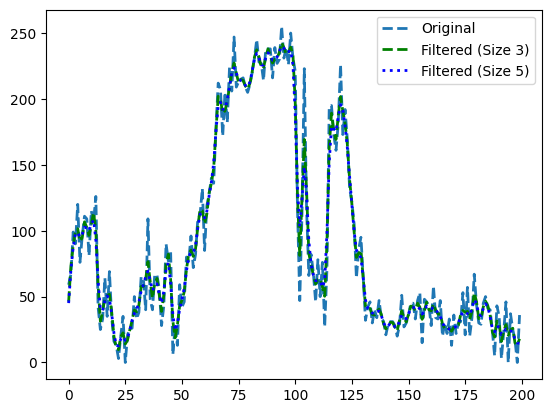

In [64]:
# Normalize the binomial filters
filtreTaille3_normalized = filtreTaille3 / np.sum(filtreTaille3)
filtreTaille5_normalized = filtreTaille5 / np.sum(filtreTaille5)

# Perform convolutions with the normalized filter
filteredTaille3_normalized = np.convolve(data, filtreTaille3_normalized, 'same')
filteredTaille5_normalized = np.convolve(data, filtreTaille5_normalized, 'same')

# Plot the signals with curves
plt.figure()

# Original signal
plt.plot(axis, data, '--', linewidth=2, label='Original')

# Signal filtered with size 3 filter
plt.plot(axis, filteredTaille3_normalized, 'g--', linewidth=2, label='Filtered (Size 3)')

# Signal filtered with size 5 filter
plt.plot(axis, filteredTaille5_normalized, 'b:', linewidth=2, label='Filtered (Size 5)')

plt.legend()
plt.show()


<div class="question">
    <div class="questionHeader">Question 2.5</div>
    Faites varier la taille du filtre et observez les changements de signal de sortie (taille: 3, 5, 7). Quelle est la taille al mieux adaptée au signal proposé ? Pourquoi ?
</div>

In [68]:
def binomial_filter(size):
    filter = np.array([1])
    for i in range(1, size):
        filter = np.convolve(filter, np.array([1, 1]))
    return filter

print(binomial_filter(3))
print(binomial_filter(5))
print(binomial_filter(7))

[1 2 1]
[1 4 6 4 1]
[ 1  6 15 20 15  6  1]


## Filtrage Gaussien 2D
### Convolution 2D
Note : cette partie est optionnelle. Vous pourrez utiliser plus bas une implémentation de la convolution de scypi
<div class="question">
    <div class="questionHeader">Question 2.6</div>
    Créez une méthode <tt>Conv2D</tt> qui prend les même paramètres que <tt>Conv1D</tt> mais où $x$ est une image 2D. 
</div>
<div class="tip">
    Ne passez pas trop de temps pendant le TP, utilisez la solution fournie. Vous pourrez re-tester à la maison votre propre implémentation si vous le souhaitez.
</div>

<div class="question">
    <div class="questionHeader">Question 2.7</div>
    Ècrire une fonction qui génère les noyaux de convolution 2D pour les filtres binomiaux d'ordre 2, 4, 6 et 10.
</div>

In [67]:
def trianglePascal(n):
    T = [[0] * (n+1) for p in range(n+1)]
    for n in range(n+1):
        if n == 0:
            T[n][0] = 1
        else:
            for k in range(n+1):
                if k == 0:
                    T[n][0] = 1
                else:
                    T[n][k] = T[n-1][k-1] + T[n-1][k]
    return T

def binomial(ordre: int):
    P = trianglePascal(ordre)
    ligne = np.array(P[ordre :]).flatten()
    print(ligne)
    B = np.zeros((ordre+1, ordre+1))
    for i in range(ordre+1):
        for j in range(ordre+1):
            B[i][j] = ligne[i] * ligne[j]
    return B

    
n = 8
T = trianglePascal(n)
T = T[n :]
print(T)

np.set_printoptions(suppress=True)
print(binomial(4))

print(binomial(10))

[[1, 8, 28, 56, 70, 56, 28, 8, 1]]
[1 4 6 4 1]
[[ 1.  4.  6.  4.  1.]
 [ 4. 16. 24. 16.  4.]
 [ 6. 24. 36. 24.  6.]
 [ 4. 16. 24. 16.  4.]
 [ 1.  4.  6.  4.  1.]]
[  1  10  45 120 210 252 210 120  45  10   1]
[[    1.    10.    45.   120.   210.   252.   210.   120.    45.    10.
      1.]
 [   10.   100.   450.  1200.  2100.  2520.  2100.  1200.   450.   100.
     10.]
 [   45.   450.  2025.  5400.  9450. 11340.  9450.  5400.  2025.   450.
     45.]
 [  120.  1200.  5400. 14400. 25200. 30240. 25200. 14400.  5400.  1200.
    120.]
 [  210.  2100.  9450. 25200. 44100. 52920. 44100. 25200.  9450.  2100.
    210.]
 [  252.  2520. 11340. 30240. 52920. 63504. 52920. 30240. 11340.  2520.
    252.]
 [  210.  2100.  9450. 25200. 44100. 52920. 44100. 25200.  9450.  2100.
    210.]
 [  120.  1200.  5400. 14400. 25200. 30240. 25200. 14400.  5400.  1200.
    120.]
 [   45.   450.  2025.  5400.  9450. 11340.  9450.  5400.  2025.   450.
     45.]
 [   10.   100.   450.  1200.  2100.  2520.  2100.  1

### Test du filtre Gaussien sur des images

<div class="question">
    <div class="questionHeader">Question 2.8</div>
    Utilisez les méthodes développées ci-dessus pour tster les filtres binomiaux sur:
    <ul>
        <li><a href="http://l3miagelw.free.fr/tim/tp02/portrait-n-blanc-bruite.png">l'image test</a></li>
        <li><a href="http://l3miagelw.free.fr/tim/tp02/fillette.png">fillette.png</a></li>
        <li><a href="http://l3miagelw.free.fr/tim/tp02/graines.png">graines.png</a></li>
    </ul>
</div>

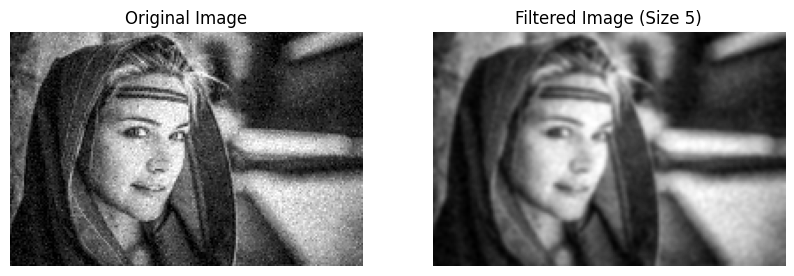

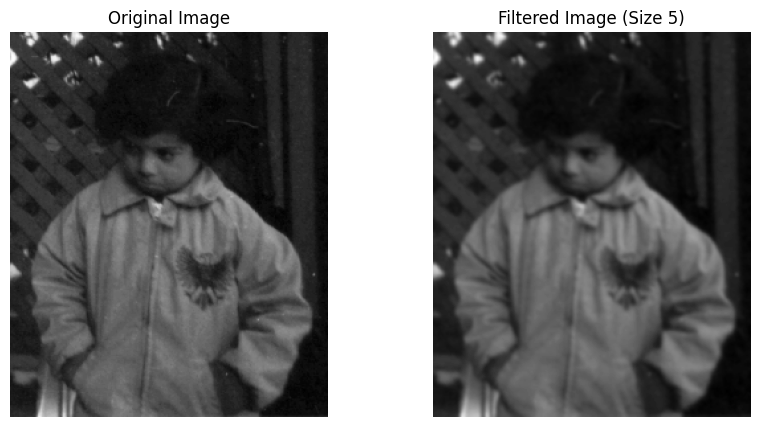

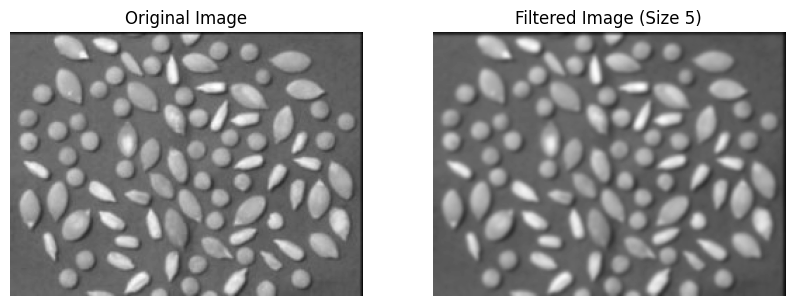

In [326]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image

# Function to create a 1D binomial kernel
def binomial_kernel_1d(size):
    kernel = np.array([1])
    for i in range(1, size):
        kernel = np.convolve(kernel, np.array([1, 1]))
    kernel = kernel / np.sum(kernel)
    return kernel

# Function to apply a 1D binomial filter in both x and y direction
def binomial_filter_2d(image, size):
    kernel = binomial_kernel_1d(size)
    smoothed = ndimage.convolve1d(image, kernel, axis=0)  # Apply kernel to x direction
    smoothed = ndimage.convolve1d(smoothed, kernel, axis=1)  # Apply kernel to y direction
    return smoothed

# Read an image using PIL

def filter_image(image_path):
    image = Image.open(image_path)


    if image.mode in ('RGBA', 'RGB'):
        image = image.convert('L')

    image = np.array(image, dtype=np.uint8) 
    
    filter_size = 5  
    filtered_image = binomial_filter_2d(image, filter_size)
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(f'Filtered Image (Size {filter_size})')
    plt.axis('off')
    
    plt.show()

    return filtered_image;

filter_image('1.png');
filter_image('2.png');
filter_image('3.png');

<div class="question">
    <div class="questionHeader">Question 2.9</div>
    Que se passe-t-il si les coefficients binomiaux ne sont pas normalisés ? Pourquoi ? 
</div>

<div class="question">
    <div class="questionHeader">Question 2.10</div>
    Une fois normalisés, qu'observez-vous ? Pourquoi ? Quel est, selon vous, le meilleur filtre pour chaque image ? Pourquoi ?
</div>

# 3- Calcul du gradient de l'image


<div class="tip">
    Dans cette partie, à présent que vous avez vérifié que votre implémentation de la convolution fonctionne, nous allons utiliser les méthodes de convolution de la librairie <tt>scipy</tt>.
</div>

In [327]:
from scipy.signal import convolve
from scipy.signal import convolve2d

## Filtre de Roberts

Le filtre de convolution le plus simple que l'on puisse utiliser pour évaluer la dérivée est donné par la différence finie suivante sur 2 pixels consécutifs : 
$$\frac{\partial I(x, y)}{\partial x} \approx \frac{\Delta I[i, j]}{\Delta i} = I[i+1, j] - I[i, j]$$
$$\frac{\partial I(x, y)}{\partial y} \approx \frac{\Delta I[i, j]}{\Delta j} = I[i, j+1] - I[i, j]$$

L'obtention des 2 gradients peut être réalisée par convolution. Cela peut être directement mis sous forme de convolution à l'aide de noyaux de convolution $[1, -1]$ et $[1, -1]^{T}$ ($T$: transposition pour obtenir le noyau en colonne).

<div class="question">
    <div class="questionHeader">Question 3.1</div>
    Complétez la méthode <tt>filtreRoberts</tt> qui prend en entrée une image 2D en niveaux de gris et renvoie en sortie 3 images 2D en niveaux de gris de la même taille.
</div>

In [328]:
def filtreRoberts(img):
    D1 = np.array([[1, 0], [0, -1]])  # Roberts kernel for X
    D2 = np.array([[0, 1], [-1, 0]])  # Roberts kernel for Y
    
    shape = np.shape(img)
    
    # Application of the Roberts filter
    robertsX = convolve2d(img, D1, 'same')
    robertsY = convolve2d(img, D2, 'same')

    robertsN = np.zeros((shape[0], shape[1]), float)


    for li in range(img.shape[0]):
        for col in range(img.shape[1]):
            robertsN[li,col] = np.sqrt(robertsX[li, col]*robertsX[li, col] + robertsY[li, col]*robertsY[li, col])


    return robertsX, robertsY, robertsN


<div class="question">
    <div class="questionHeader">Question 3.2</div>
    Testez cette méthode sur les images <a href="http://l3miagelw.free.fr/tim/tp02//panda.jpg">panda.jpg</a>, <a href="http://l3miagelw.free.fr/tim/tp02//circuit.png">circuit.png</a> et <a href="http://l3miagelw.free.fr/tim/tp02//graines.png">graines.png</a>.
    En utilisant plt, vous pouvez représenter l'image originale et les 3 dérivées sur une figure (n'oubliez pas d'ajouter des légendes sous chacune des sous-figure).
</div>

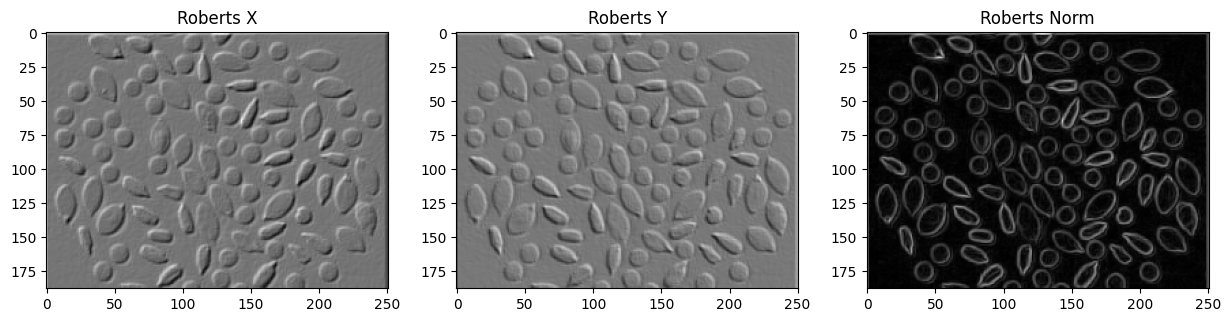

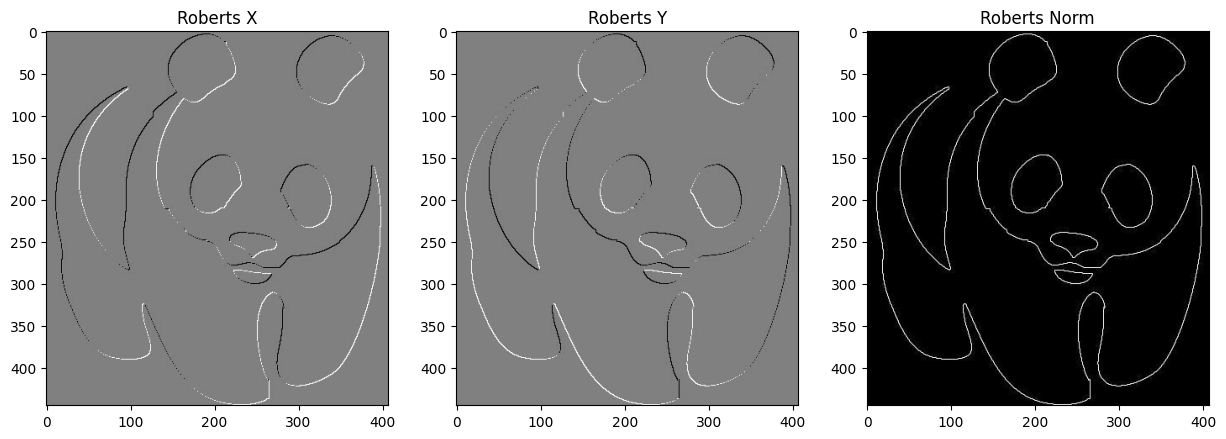

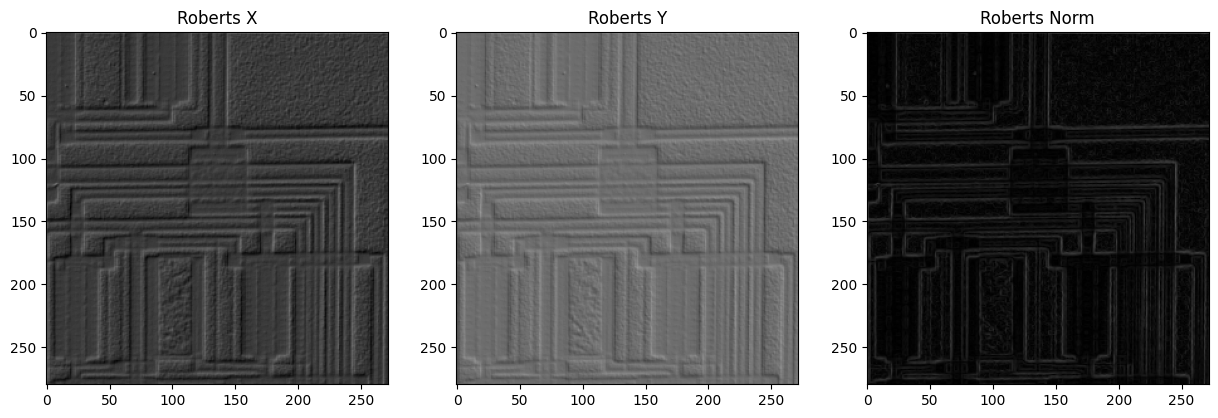

In [329]:
# Read the image using PIL and convert it to grayscale


def filter_image_roberts(image_path):
    image = Image.open(image_path).convert('L')
    image = np.array(image)
    
    # Apply the Roberts filter
    robertsX, robertsY, robertsN = filtreRoberts(image)
    
    # Display the images
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(robertsX, cmap='gray')
    plt.title('Roberts X')
    
    plt.subplot(1, 3, 2)
    plt.imshow(robertsY, cmap='gray')
    plt.title('Roberts Y')
    
    plt.subplot(1, 3, 3)
    plt.imshow(robertsN, cmap='gray')
    plt.title('Roberts Norm')

    return robertsN


filter_image_roberts('4.png');
filter_image_roberts('5.jpg');
filter_image_roberts('6.png');


<div class="question">
    <div class="questionHeader">Question 3.3</div>
    Observez les valeurs obtenues dans les différentes images. Entre quelles valeurs varient ces fonctions ? Y a-t-il des effets debords ? Pourquoi ?
</div>

## Filtre de Sobel

Afin de limiter l'influence du bruit, on va désormais filtrer (type passe-bas : binomial ou moyenne) l'image dans la direction perpendiculaire au passage du filtre dérivateur.

L'opérateur de dérivation est cette fois défini comme la différence finie centrée de noyau de convolution $[1, 0, -1]$ et le lissage (intégrateur) est défini par le noyau binomial $[1, 2, 1]$.
En combinant ces 2 noyaux de convolution, on forme les filtres de Sobel en $x$ et en $y$.

<div class="question">
    <div class="questionHeader">Question 3.4</div>
    Complétez la méthode <tt>filtreSobel</tt> vuiante qui prend en entrée une image 2D en niveaux de gris et renvoie en sortie 3 images 2D en niveaux de gris de même taille :
</div>

In [330]:
def filtreSobel(img):
    # Ici le filtrage est 2D.
    # Fitre de Sobel 2D en lignes
    Gx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
    # Filgre de Sobel 2D en colonnnes
    Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
 
    # On crée une image 2D pour le filtre de Sobel en lignes
    sobelX = np.zeros((img.shape[0], img.shape[1]), np.dtype(int))
    sobelX = convolve2d(img, Gx, 'same')
 
    # On crée une image 2D pour le filtre de Sobel en colonnes
    sobelY = np.zeros((img.shape[0], img.shape[1]), np.dtype(int))
    sobelY = convolve2d(img, Gy, 'same')
 
    # On calcule la norme de ces 2 images
    sobelN = np.zeros((img.shape[0], img.shape[1]), np.dtype(float))
    for li in range(img.shape[0]):
        for col in range(img.shape[1]):
            sobelN[li, col] = np.sqrt(sobelX[li, col]*sobelX[li, col] + sobelY[li, col]*sobelY[li, col])
 
    return sobelX, sobelY, sobelN

<div class="question">
    <div class="questionHeader">Question 3.5</div>
    Testez cette méthode sur les images <a href="http://l3miagelw.free.fr/tim/tp02//panda.jpg">panda.jpg</a>, <a href="http://l3miagelw.free.fr/tim/tp02//circuit.png">circuit.png</a> et <a href="http://l3miagelw.free.fr/tim/tp02//graines.png">graines.png</a>.
    En utilisant plt, vous pouvez représenter l'image originale et les 3 dérivées sur une figure (n'oubliez pas d'ajouter des légendes sous chacune des sous-figure).
</div>

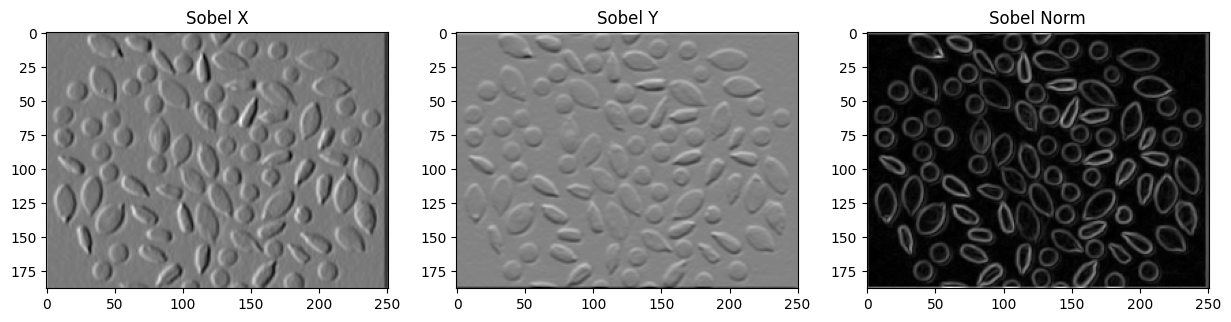

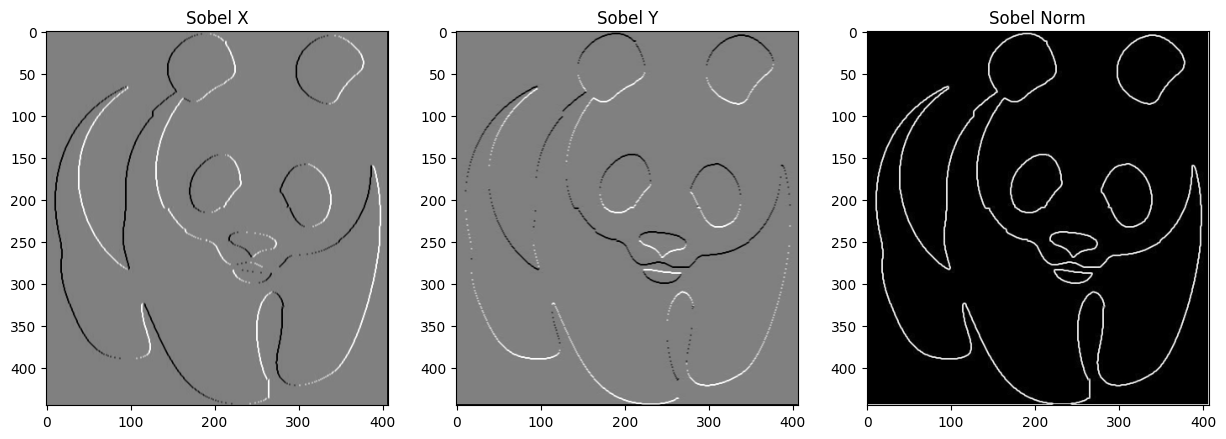

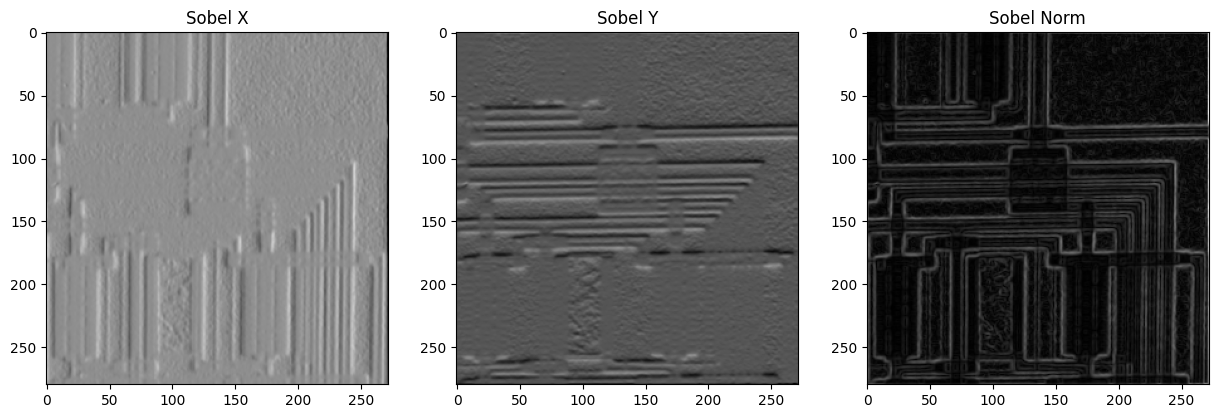

In [331]:
def filter_image_sobel(image_path):
    image = Image.open(image_path).convert('L')
    image = np.array(image)
    
    # Apply the Sobel filter
    sobelX, sobelY, sobelN = filtreSobel(image)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(sobelX, cmap='gray')
    plt.title('Sobel X')
    
    plt.subplot(1, 3, 2)
    plt.imshow(sobelY, cmap='gray')
    plt.title('Sobel Y')
    
    plt.subplot(1, 3, 3)
    plt.imshow(sobelN, cmap='gray')
    plt.title('Sobel Norm')
    
    plt.show()

    return sobelN

filter_image_sobel('4.png');
filter_image_sobel('5.jpg');
filter_image_sobel('6.png');

<div class="question">
    <div class="questionHeader">Question 3.6</div>
    Pourquoi, dans l'image de la norme du gradient des graines, certains contours de graines sont ils plus blancs que d'autres ? 
    Pourquoi, à votre avis, les contours en X des graines semblent ils plus prononcés que les contours en Y ?
</div>

In [332]:
import json
import numpy as np
import cv2
from skimage import draw
from sklearn.metrics import precision_score, recall_score, f1_score
from scipy.spatial import distance


# The function that loads and parses the JSON data from file
def load_json_label_data(json_file_path):
    with open(json_file_path, 'r') as file:
        json_data = json.load(file)
        
    annotations = json_data[0]['annotations']
    
    contour_list = []
    image_info = {}
    
    for annotation in annotations:
        for result in annotation['result']:
            if 'polygonlabels' in result['value']:
                label_points = result['value']['points']
                contour_list.append(label_points)
                
                if not image_info:
                    image_info = {
                        'original_width': result['original_width'],
                        'original_height': result['original_height']
                    }
    
    return contour_list, image_info

def get_mean_error(data):
    def find_nearest_edge_point(point):
        return min(distance.euclidean(point, edge_point) for edge_point in data)

    mean_errors = []
    
    normalized_contours = []
    
    for polygon in contours:
        hand_labelled_points = np.array(polygon)
    
        hand_labelled_points = [[image_info["original_width"] / 100 * point[0], image_info["original_height"] / 100 * point[1]] for point in hand_labelled_points ]
        hand_labelled_points.append(hand_labelled_points[0]) # close polygon
        normalized_contours.append(hand_labelled_points)
    
        errors = [find_nearest_edge_point(point) for point in hand_labelled_points]
        
        # Get average error for current polygon
        mean_errors.append(sum(errors) / len(errors))
    
    overall_mean_error = sum(mean_errors) / len(mean_errors)

    return overall_mean_error


In [333]:
def plot_with_label(data):
    fig, axs = plt.subplots(2, figsize=(10, 5))

    # Compute the dimensions of the robertsN array
    dataN_height, dataN_width = data.shape
    
    # Plotting the roberts edges
    dataN_bool = data > 30  # Play around with the threshold value
    y,x = np.nonzero(dataN_bool)
    axs[0].scatter(x, y, s=1);
    axs[0].set_xlim([0, dataN_width]);
    axs[0].set_ylim([dataN_height, 0]);
    
    # Plotting each contour
    for polygon in normalized_contours:
        polygon = np.array(polygon) # convert to numpy array for indexing
        axs[1].plot(polygon[:,0], polygon[:,1], color='blue');
    axs[1].set_xlim([0, dataN_width]);
    axs[1].set_ylim([dataN_height, 0]);    
    
    plt.show()

In [343]:
json_file_path = '4-test-data.json'

contours, image_info = load_json_label_data(json_file_path)

6.762526118206567


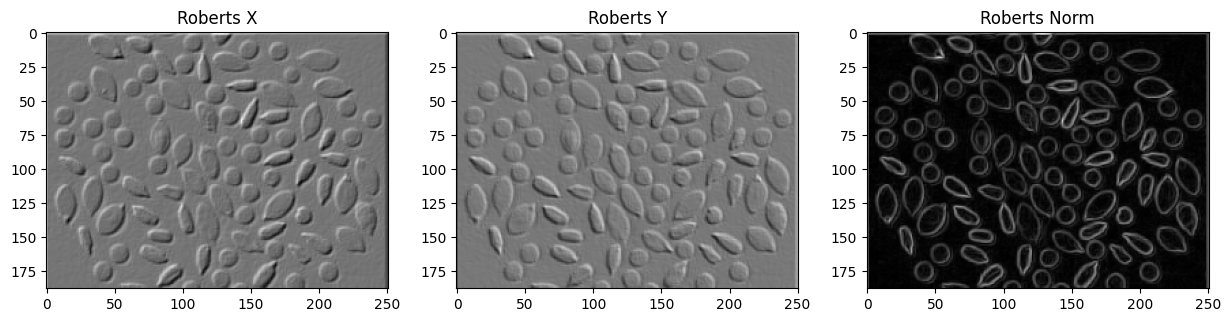

In [335]:
robertsN = filter_image_roberts('4.png')

robertsN_bool = robertsN > 30

roberts_edge_points = np.transpose(np.nonzero(robertsN_bool))

print(get_mean_error(roberts_edge_points))

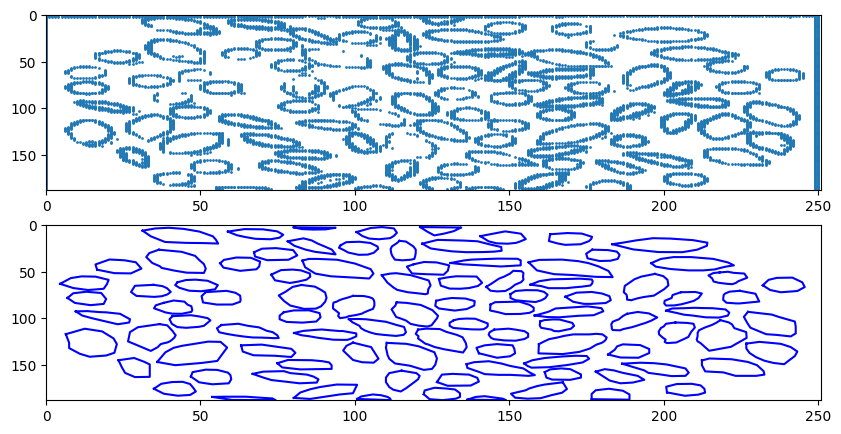

In [336]:
plot_with_label(robertsN)

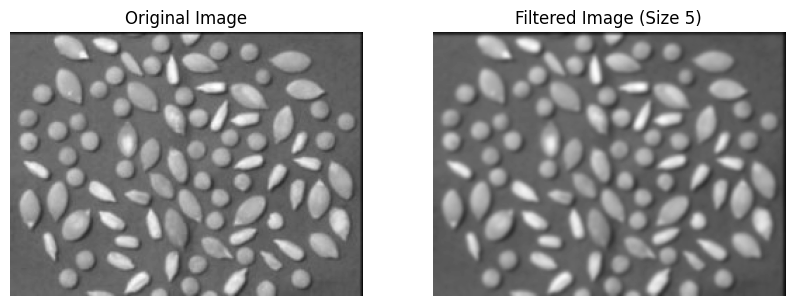

7.6658468193726135


In [337]:
filtered = filter_image('4.png')

robertsX, robertsY, robertsN = filtreRoberts(filtered)

robertsN_bool = robertsN > 30

roberts_edge_points = np.transpose(np.nonzero(robertsN_bool))

print(get_mean_error(roberts_edge_points))


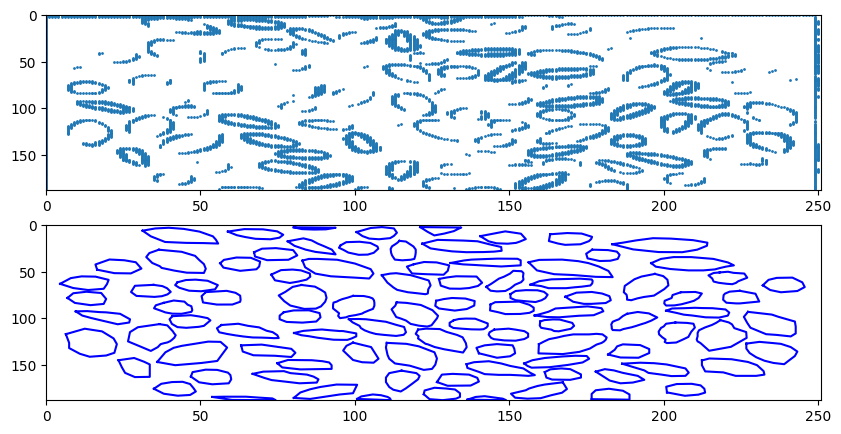

In [338]:
plot_with_label(robertsN)

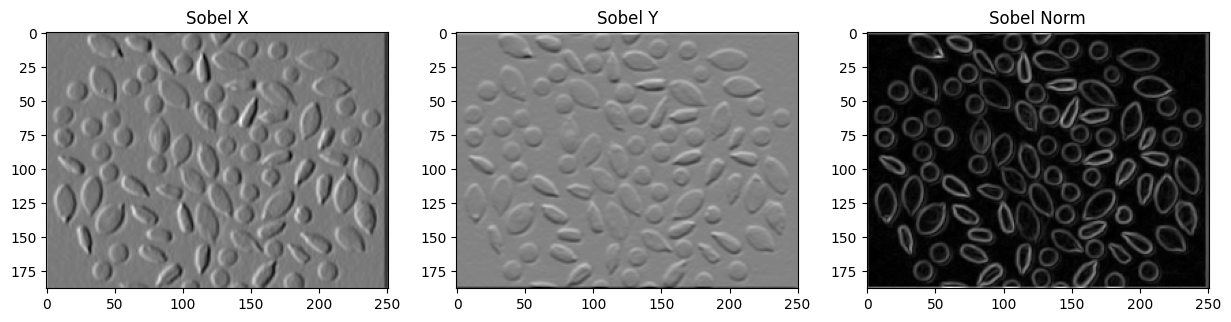

5.467299996519814


In [339]:
sobelN = filter_image_sobel('4.png')

sobelsN_bool = sobelN > 30

sobel_edge_points = np.transpose(np.nonzero(sobelsN_bool))

print(get_mean_error(sobel_edge_points))

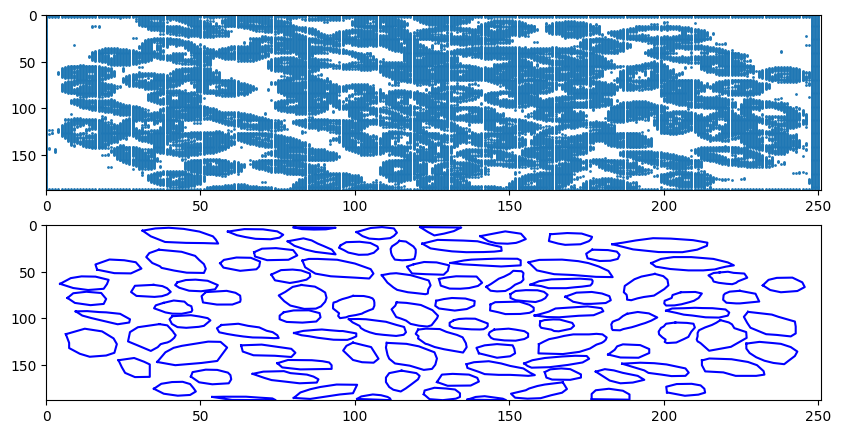

In [340]:
plot_with_label(sobelN)

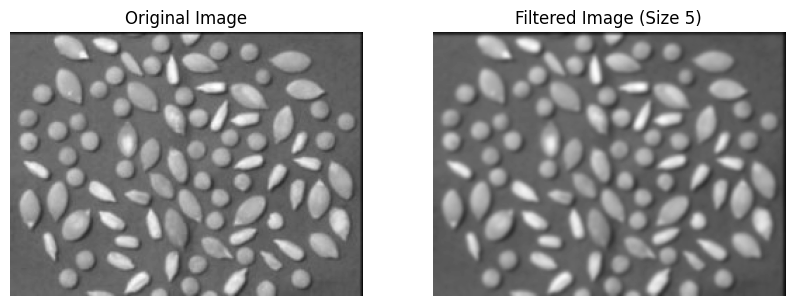

5.535238600205641


In [341]:
filtered = filter_image('4.png')
sobelX, sobelY, sobelN  = filtreSobel(filtered)

sobelsN_bool = sobelN > 30

sobel_edge_points = np.transpose(np.nonzero(sobelsN_bool))

print(get_mean_error(sobel_edge_points))


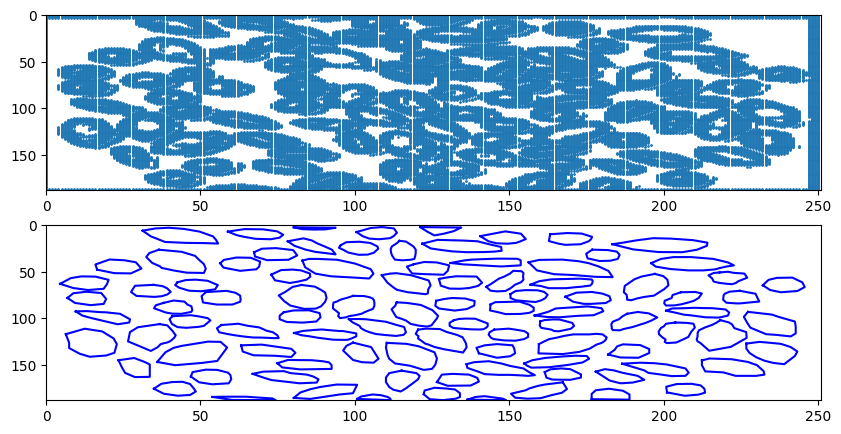

In [342]:
plot_with_label(sobelN)